### 【 251127_과제 】


In [1]:
## ===============================================================
## [문제 1] 개념 비교
## ===============================================================
## 일반 평균, 절사 평균, 가중 평균의 공통점과 차이점을 간단히 서술하세요.
# - 공통점 : 모두 대표값을 찾기 위한 지표로 평균을 구하려 한다
# - 차이점 : 일반 평균과 달리 절사/가중 평균은 이상치를 고려하여 평균값을 구한다

## 다음 상황에서 어떤 평균을 쓰는 것이 적절한지 고르고 이유를 쓰세요.

## (1) 극단값이 포함된 연봉 데이터의 대표값
# - 절사 평균 : 극단값에 의해 평균이 달라짐
## (2) 각기 다른 표본 수를 가진 실험 그룹들의 평균 반응값 통합
# - 가중 평균 : 표본 수에 따라 많은 쪽의 비중과  적은 쪽의 비중을 다르게 해야함
## (3) 시험 점수 중 최근 시험에 더 높은 비중을 주고 싶을 때
# - 가중 평균 : 최근의 시험들의 비중을 높이기위해

In [2]:
## ===============================================================
## [문제 2] 반별 평균을 통합할 때 – 가중평균
## ===============================================================
## A반과 B반의 시험 결과가 다음과 같다.
##
## A반: 학생 수 10명, 평균 90점
##
## B반: 학생 수 40명, 평균 70점

## 전체 50명에 대한 단순 평균을 잘못 계산한 경우 (반 평균의 평균)과
## - 잘못 계산한 경우(일반 평균) : 80점
## 올바른 전체 평균(가중평균) 을 계산하세요.
## - 가중평균 : ( 10*90 + 40*70 ) / (10 + 40) = 74

In [3]:
import pandas as pd
import scipy
## ===============================================================
## [문제 3] 절사 평균 계산
## ===============================================================
## 데이터는 아래와 같습니다. 
x=[10,12,11,9,13,200]
x = pd.DataFrame(x)

## 일반 평균을 구하시오.
print(x.mean())
## 가장 작은 값과 가장 큰 값(10, 200)을 하나씩 제거한 후 절사 평균을 구하시오.
print(x[1:-1].mean())
## 왜 절사 평균이 일반 평균보다 극단값에 덜 민감한지 설명하시오.
## - 극소수의 극단값에 의해 비정상 적으로 커져있는 분산을 정상화 시키기 때문

0    42.5
dtype: float64
0    11.25
dtype: float64


In [4]:
## ===============================================================
## [문제 4] 가중 평균 계산
## ===============================================================
## 어떤 회사의 고객 만족도 조사는 다음과 같습니다. 
##  그룹	응답자 수	평균 점수
##  VIP	      20	    4.8
##  일반	  200	    4.2
##
## 전체 고객의 가중 평균 만족도 점수를 계산하시오.
## 단순히 (4.8 + 4.2) / 2 로 계산하는 것이 왜 잘못되었는지 설명하시오.
print(((20*4.8) + (200*4.2)) / 220)
print("응답자의 수가 두 그룹이 서로 다르기 때문에 전체 평균을 구할 때 가중치를 다르게 줘야함")

4.254545454545455
응답자의 수가 두 그룹이 서로 다르기 때문에 전체 평균을 구할 때 가중치를 다르게 줘야함


In [5]:
## ===============================================================
##  [문제 5] Pandas로 그룹별 가중평균 계산 
## ===============================================================
## 다음과 같은 DataFrame이 있습니다.

df = pd.DataFrame({
    "group":  ["A", "A", "A", "B", "B"],
    "score":  [80, 90, 70, 60, 100],
    "weight": [1, 2, 1, 3, 1]
})
# print(df)
## group별 단순 평균(score의 평균)을 구하시오.
ret = df.groupby('group')['score'].mean()
print(ret)
## group별 가중평균(weight를 가중치로 사용)을 구하는 Pandas 코드를 작성하시오.
print('가중평균 :', (df['score'] * df['weight']).sum() / df['weight'].sum())


group
A    80.0
B    80.0
Name: score, dtype: float64
가중평균 : 76.25


In [6]:
## ===============================================================
##  [ 문제 6 ] 분산과 표준편차 비교
## ===============================================================
## 다음은 어느 반 학생 10명의 수학 시험 점수이다.
## A반: [70, 72, 75, 75, 76, 80, 82, 85, 88, 90]
## B반: [40, 55, 60, 70, 75, 90, 95, 98, 100, 100]
a = pd.Series([70, 72, 75, 75, 76, 80, 82, 85, 88, 90])
b = pd.Series([40, 55, 60, 70, 75, 90, 95, 98, 100, 100])

## 두 반의 분산(sample variance)을 각각 구하시오.
print(a.var(),b.var())
## 두 반의 표준편차를 비교하고, 어느 반의 점수 분포가 더 불안정한지 설명하시오.
print(a.std(),b.std())
print('b반의 분산과 표준편차가 10배가까이 큼 -> 불안정')



46.455555555555556 463.3444444444445
6.8158312446506155 21.525437148742053
b반의 분산과 표준편차가 10배가까이 큼 -> 불안정


In [ ]:
## ===============================================================
##  [ 문제 7] 중위절대편차(Median Absolute Deviation, MAD) 계산
## ===============================================================
## 다음은 특정 제조 공정에서 측정한 부품 길이(mm) 데이터입니다..
 
x = pd.Series([99.8, 100.1, 100.0, 100.2, 99.9, 100.3, 100.5, 94.0])


## 위 데이터의 중앙값(median)을 구하시오.
print(x.median())
## 각 데이터에서 중앙값을 뺀 절대값을 구하시오.
print(abs(x - x.median()))
## 그 절대값 리스트의 중앙값(MAD)을 구하시오.
print("MAD : ", abs(x-x.median()).median())
## 이 데이터에서 MAD가 낮은지 높은지 해석하시오.
print("낮은거 같음")
## 마지막 데이터 94.0을 제거했을 때 MAD는 어떻게 변하는가? 그 이유는?
print("MAD2 : ", abs(x[:-1]-x[:-1].median()).median()) 
print("중위절대펴차가 조금 낮아짐. 비교적 더 안정화 됨. ? : 이상치인 94를 제거했기 때문")


100.05
0    0.25
1    0.05
2    0.05
3    0.15
4    0.15
5    0.25
6    0.45
7    6.05
dtype: float64
MAD :  0.20000000000000284
낮은거 같음
MAD2 :  0.19999999999998863
중위절대펴차가 조금 낮아짐. 비교적 더 안정화 됨. ? : 이상치인 94를 제거했기 때문


In [8]:
## ===============================================================
##  [ 문제 8 ] 이상치 포함 시 통계량 비교
## ===============================================================
## 어느 판매원의 하루 판매 금액(만원 단위)이 일주일 동안 다음과 같습니다.
x = pd.Series([10, 12, 11, 9, 10, 13, 100])


##  평균(mean)과 중앙값(median)을 각각 구하시오.
print(x.mean(), x.median())
##  분산과 표준편차를 구하시오.
print(x.var(), x.std())
##  중위절대편차(MAD)를 구하시오.
print("MAD : ", abs(x-x.median()).median())
##  왜 이 데이터에서는 평균보다 중앙값이 대표값으로 적절한지 설명하시오.
print('100이라는 큰 이상치가 있기 때문에 평균시 값이 확 튀게 됨')
##  MAD가 왜 robust한 지표인지 해당 데이터를 기준으로 설명하시오.
print('위와 동일하게 계산시 평균이 아닌 중앙값들을 사용하기 때문에 비교적 이상치에 덜 민감한다')


23.571428571428573 11.0
1137.6190476190477 33.72860874123105
MAD :  1.0
100이라는 큰 이상치가 있기 때문에 평균시 값이 확 튀게 됨
위와 동일하게 계산시 평균이 아닌 중앙값들을 사용하기 때문에 비교적 이상치에 덜 민감한다


a
q1 : 50.0
q2 : 50.0
q3 : 51.0
b
q1 : 49.5
q2 : 51.0
q3 : 54.25
a 사분위수 범위 :  1.0
b 사분위수 범위 :  4.75
a 이상치 :  []
b 이상치 :  []


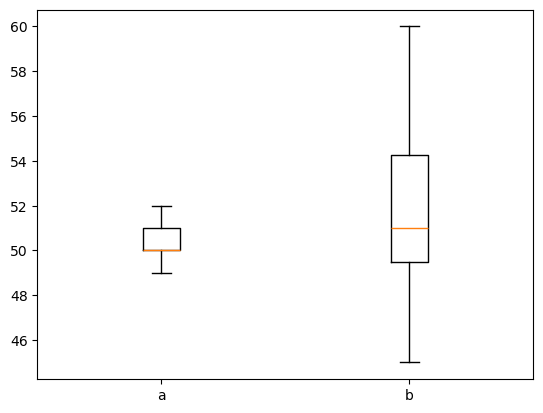

a의 변동성이 더 적어서 안정성이 높아 보임


In [ ]:
## ===============================================================
##  [ 문제 9] 상자그림(Boxplot) 분석
## ===============================================================
## 다음은 두 공정(A, B)에서 생산된 동일 부품의 길이 데이터이다.

## A공정: [50, 50, 51, 50, 49, 50, 51, 52]
## B공정: [50, 55, 45, 50, 60, 48, 54, 52]
a = pd.Series([50, 50, 51, 50, 49, 50, 51, 52])
b = pd.Series([50, 55, 45, 50, 60, 48, 54, 52])
## 각 공정의 Q1, Q2(중앙값), Q3를 구하시오.
print("a")
print(f'q1 : {a.quantile(0.25)}')
print(f'q2 : {a.quantile(0.5)}')
print(f'q3 : {a.quantile(0.75)}')
print("b")
print(f'q1 : {b.quantile(0.25)}')
print(f'q2 : {b.quantile(0.5)}')
print(f'q3 : {b.quantile(0.75)}')
## IQR(사분위수 범위)을 계산하시오.
iqr_a = a.quantile(0.75) - a.quantile(0.25)
iqr_b = b.quantile(0.75) - b.quantile(0.25)
print('a 사분위수 범위 : ', a.quantile(0.75) - a.quantile(0.25))
print('b 사분위수 범위 : ', b.quantile(0.75) - b.quantile(0.25))

## 사분위수 1.5 IQR 규칙에 따라 각 공정의 이상치를 판정하시오.
a_l = a[( a > a + iqr_a*1.5) | (a < a - iqr_a*1.5)].tolist()
b_l = b[( b > b + iqr_b*1.5) | (b < b - iqr_b*1.5)].tolist()

print('a 이상치 : ',a_l)    
print('b 이상치 : ',b_l)

## 두 공정의 상자그림을 그리고, 변동성 차이를 해석하시오.
import matplotlib.pyplot as plt
plt.boxplot([a,b], tick_labels=['a', 'b'])
plt.show()
## 품질 안정성 측면에서 어떤 공정이 더 적합한지 설명하시오.
print('a의 변동성이 더 적어서 안정성이 높아 보임')

8063.5 3975.0
7474.27959915307 55864855.526315786
MAD : 200.0


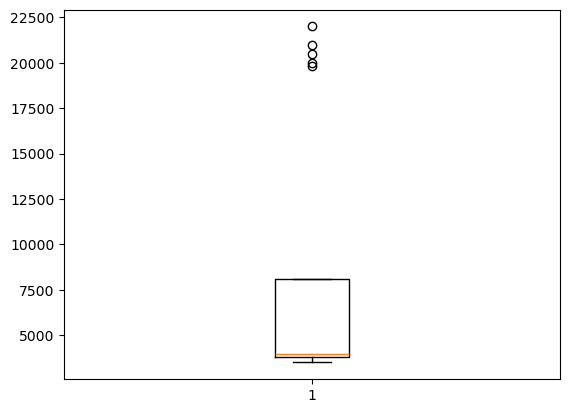

이상치 : [20000, 21000, 20500, 19800, 22000]
극단치 영향이 적어 실제 분포를 더 잘 반영함
대표값은 중앙값, 변동성 지표는 MAD 사용이 적합함


In [10]:
## ===============================================================
##  [ 문제 10 ] 분산·표준편차 vs MAD vs Boxplot 통합 분석
## ===============================================================
## 다음은 20명의 하루 걸음수 데이터입니다.

x = pd.Series([3500, 4200, 3800, 4000, 4100,
 3950, 4020, 3900, 3800, 3700,
 20000, 21000, 20500, 19800, 22000,
 3600, 3700, 3800, 3900, 4000])


## 평균, 중앙값을 구하시오.
print(x.mean(), x.median())
## 분산, 표준편차를 구하시오.
print(x.std(), x.var())
## MAD를 구하시오.
print("MAD :", abs(x - x.median()).median())
## 상자그림(Boxplot)을 그리고 극단치를 판정하시오.
plt.boxplot(x)
plt.show()

Q1, Q3 = x.quantile(0.25), x.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print("이상치 :", x[(x < lower) | (x > upper)].tolist())

## 이 데이터에서 “변동성을 판단할 때 표준편차보다 MAD가 더 적합한 이유”를 설명하시오.
print("극단치 영향이 적어 실제 분포를 더 잘 반영함")

## 만약 건강앱에서 사용자 걸음 트렌드를 분석하려 한다면, 
## 어떤 대표값과 어떤 변동성 지표를 사용하는 것이 좋은지 이유와 함께 제안하시오.
print("대표값은 중앙값, 변동성 지표는 MAD 사용이 적합함")